In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\AI homework\Multiple Regression\dataset\weather (1).csv')
df.info(); df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature_c       10000 non-null  float64
 1   Humidity            10000 non-null  float64
 2   Wind_Speed_kmh      10000 non-null  float64
 3   Pressure_millibars  10000 non-null  float64
 4   Rain                10000 non-null  int64  
 5   Description         10000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB


,Temperature_c,Humidity,Wind_Speed_kmh,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,1021.60,0,Cold
1,21.111111,0.73,20.9300,1017.00,1,Warm
2,16.600000,0.97,5.9731,1013.99,1,Normal
3,1.600000,0.82,3.2200,1031.59,1,Cold
4,2.194444,0.60,10.8836,1020.88,1,Cold


In [4]:
# 对Description列进行独热编码
df = pd.get_dummies(df, columns=['Description'], drop_first=True)
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,1021.60,0,False,False
1,21.111111,0.73,20.9300,1017.00,1,False,True
2,16.600000,0.97,5.9731,1013.99,1,True,False
3,1.600000,0.82,3.2200,1031.59,1,False,False
4,2.194444,0.60,10.8836,1020.88,1,False,False


In [5]:
from sklearn.model_selection import train_test_split

# 定义特征和目标
X = df.drop('Temperature_c', axis=1)  # 特征
y = df['Temperature_c']                 # 目标

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

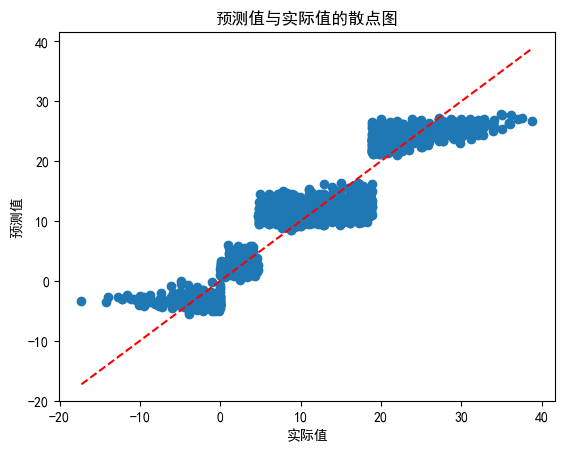

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'simHei']  # 指定中文字体为黑体，防止乱码
plt.rcParams['axes.unicode_minus'] = False     # 使用ASCII字符，保证显示正确
# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X_train, y_train)

# 对测试数据进行预测
y_pred = model.predict(X_test)

# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('预测值与实际值的散点图')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 添加对角线
plt.show()

In [9]:
# 输出线性回归方程
coefficients = model.coef_  # 获取特征的系数
intercept = model.intercept_  # 获取截距

# 打印方程
equation = "y = {:.4f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.4f} * {}".format(coef, X.columns[i])

print("线性回归方程:", equation)

线性回归方程: y = 4.2148 + -8.3445 * Humidity + -0.0696 * Wind_Speed_kmh + 0.0003 * Pressure_millibars + 5.7675 * Rain + 8.5890 * Description_Normal + 19.3162 * Description_Warm


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# 计算指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# 将结果存入数据框
metrics_df = pd.DataFrame({
    '指标': ['MAE', 'MSE', 'RMSE', 'R2'],
    '值': [mae, mse, rmse, r2]
})

print("误差指标为:",metrics_df)

误差指标为:      指标          值
0   MAE   2.857437
1   MSE  12.335722
2  RMSE   3.512225
3    R2   0.858953


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
